In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests # library to handle requests

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#!conda install -c conda-forge folium --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

<h2>Collecting Data</h2>

<h3>Collecting Venues</h3>

The following code is based off the framework built in the labs of the Capstone project

In [4]:
raw_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df_t = raw_data[0]
df_t = df_t[df_t['Borough'] != 'Not assigned'].reset_index(drop = True)
df_geo = pd.read_csv('https://cocl.us/Geospatial_data')
df_full = df_t.merge(df_geo, on='Postal Code', validate='1:1')
df_full.head(5)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [3]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 800
LIMIT = 100

In [9]:
#Using function from Lab to assist

def getNearbyFood(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            '4d4b7105d754a06374d81259' #This is the category Id for food
        )
            
        # make the GET request
        resJson = requests.get(url).json()
        
        try:
            results = resJson['response']['venues']

            for v in results:
                cats = v['categories']
                primeCat = ''
                for cat in cats:
                    if cat['primary'] == True:
                        primeCat = cat['name']

                # return only relevant information for each nearby venue
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    primeCat,
                    v['id'])])
        except:
            print(resJson['response'])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Id']
    
    return(nearby_venues)

In [6]:
toronto_venues = getNearbyFood(names=df_full['Neighborhood'],
                                   latitudes=df_full['Latitude'],
                                   longitudes=df_full['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [40]:
toronto_venues.drop_duplicates(subset=['Venue Id'], inplace=True)

In [41]:
toronto_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant,4e6696b6d16433b9ffff47c3
1,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,4b8fe578f964a520106833e3
2,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,4bbe904a85fbb713420d7167
3,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant,4d689350b6f46dcb77ee15b2
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4f3ecce6e4b0587016b6f30d


In [42]:
toronto_venues.shape

(2028, 8)

In [43]:
toronto_venues.to_csv('venue_data.csv')

We then save the data to an external file to speed up work on following days.

In [4]:
toronto_venues = pd.read_csv('venue_data.csv', index_col=0)
toronto_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant,4e6696b6d16433b9ffff47c3
1,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,4b8fe578f964a520106833e3
2,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,4bbe904a85fbb713420d7167
3,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant,4d689350b6f46dcb77ee15b2
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4f3ecce6e4b0587016b6f30d


<h3>Collecting Venue Ratings</h3>

We use a similar method to collecting the rating data. However, this one must take into consideration that we can only get data for 500 venues in a single day.

In [4]:
def getVenueRatingData(venueId):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
        venueId,
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION
    )
            
    # make the GET request
    resJson = requests.get(url).json()
    
    try:
        venue = resJson['response']['venue']
    
        rating = -1
        try:
            rating = venue['rating']
        except:
            rating = -1

        checkinsCount = -1
        try:
            checkinsCount = venue['stats']['checkinsCount']
        except:
            checkinsCount = -1

        usersCount = -1
        try:
            usersCount = venue['stats']['usersCount']
        except:
            usersCount = -1

        tipCount = -1
        try:
            tipCount = venue['stats']['tipCount']
        except:
            tipCount = -1

        visitsCount = -1
        try:
            visitsCount = venue['stats']['visitsCount']
        except:
            visitsCount = -1         

        #print('Rating ' + str(rating))
        #print('Likes ' + str(venue['likes']['count']))
        #print('checkinsCount ' + str(checkinsCount))
        #print('usersCount ' + str(usersCount))
        #print('tipCount ' + str(tipCount))
        #print('visitsCount ' + str(visitsCount))
        return([venueId,rating,venue['likes']['count'],checkinsCount,usersCount,tipCount,visitsCount])
    except:
        print(str(venueId) + str(resJson['response']))
        return([venueId,-1,-1,-1,-1,-1,-1])
    

For a few days, we collect data from a subset of the list of venues and append it to a file.

In [7]:
venueData = list()
#NEED TO ALWAYS UPDATE THIS WHEN PUSHING FORWARD TAKE THE SECOND NUMBER AND MAKE IT THE FIRST
for i in range(2300,2370):
    if i not in toronto_venues.index:
        continue
    venueId = toronto_venues.loc[i]['Venue Id']
    venueData.append(getVenueRatingData(venueId))
    

In [8]:
venue_ratings = pd.DataFrame(venueData,columns=['Venue Id','Rating','Likes','Checked In','Users','Tips','Visits'])
venue_ratings

,Venue Id,Rating,Likes,Checked In,Users,Tips,Visits
0,515f2243e4b0a321e617d275,-1.0,0,-1,-1,0,-1
1,5d72a31ae9abad0008ea33c2,-1.0,1,-1,-1,0,-1
2,4c6b09647c052d7f95b328cf,-1.0,0,-1,-1,1,-1
3,4e2b4705d164223a69808a57,6.0,5,-1,-1,1,-1
4,5cf16bf365211f002c42dd44,-1.0,0,-1,-1,0,-1
...,...,...,...,...,...,...,...
370,4fb27945e4b0d2c83d3113cd,-1.0,2,-1,-1,3,-1
371,4b68c583f964a520128c2be3,-1.0,0,-1,-1,0,-1
372,4fc67149e4b00925be18a8d8,-1.0,1,-1,-1,0,-1
373,5e6f65d3a441c20008b7b3fe,-1.0,0,-1,-1,0,-1


In [9]:
venue_ratings.to_csv("venue_ratings.csv",mode='a+',header=False)

We now have a full file to use.

In [5]:
venue_ratings = pd.read_csv("venue_ratings_full.csv",index_col=0)

<h3>Data Analysis</h3>

In [6]:
full_data = toronto_venues.merge(venue_ratings, on='Venue Id')
full_data

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id,Rating,Likes,Checked In,Users,Tips,Visits
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant,4e6696b6d16433b9ffff47c3,-1.0,0,-1,-1,0,-1
1,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,4b8fe578f964a520106833e3,-1.0,1,-1,-1,1,-1
2,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,4bbe904a85fbb713420d7167,6.5,21,-1,-1,7,-1
3,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant,4d689350b6f46dcb77ee15b2,-1.0,0,-1,-1,0,-1
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4f3ecce6e4b0587016b6f30d,6.5,6,-1,-1,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Burrito Boyz,43.626657,-79.526349,Burrito Place,4fb27945e4b0d2c83d3113cd,-1.0,2,-1,-1,3,-1
2107,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Mama K's,43.626359,-79.519064,BBQ Joint,4b68c583f964a520128c2be3,-1.0,0,-1,-1,0,-1
2108,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kerr's,43.627079,-79.517692,Dessert Shop,4fc67149e4b00925be18a8d8,-1.0,1,-1,-1,0,-1
2109,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Landscape Coffee Roaster,43.633419,-79.522599,Coffee Shop,5e6f65d3a441c20008b7b3fe,-1.0,0,-1,-1,0,-1


In [7]:
full_data_rated = full_data[full_data['Rating'] >= 0] #We are only going to analyze restaurants with ratings.
full_data_rated.reset_index(inplace=True)
full_data_rated = full_data_rated.drop(columns=['index'])
full_data_rated

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Id,Rating,Likes,Checked In,Users,Tips,Visits
0,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,4bbe904a85fbb713420d7167,6.5,21,-1,-1,7,-1
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,4f3ecce6e4b0587016b6f30d,6.5,6,-1,-1,12,-1
2,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,53b8466a498e83df908c3f21,8.7,49,-1,-1,22,-1
3,"Regent Park, Harbourfront",43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop,51853a73498e4d97a8b20831,8.9,241,-1,-1,71,-1
4,"Regent Park, Harbourfront",43.654260,-79.360636,Rocco's No Frills,43.651419,-79.365947,Grocery Store,4d7257fd3815f04d0ef18b67,5.9,48,-1,-1,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,7-Eleven,43.629107,-79.517431,Convenience Store,4c0313980d0e0f478225029a,6.0,8,-1,-1,3,-1
912,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Artisano Bakery Café,43.631006,-79.518172,Bakery,4b1d492af964a520370e24e3,6.6,34,-1,-1,24,-1
913,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Subway,43.631659,-79.519001,Sandwich Place,4c116455d41e76b09552310d,6.2,1,-1,-1,0,-1
914,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Tim Hortons,43.623671,-79.515674,Coffee Shop,4e40179e1850e991efcc8d22,6.2,1,-1,-1,0,-1


Mapping restaurants with ratings.

In [49]:
colors_array = cm.hot(np.linspace(0, 1, 10))
heat_colors = [colors.rgb2hex(i) for i in colors_array]
heat_colors

toronto_map = folium.Map(location=[43.6532,-79.3832],zoom_start=14)

restaurants = folium.map.FeatureGroup()

ct = full_data_rated.shape[0]

for i in range(0,ct):
    lat = full_data_rated.loc[i]['Venue Latitude']
    lng = full_data_rated.loc[i]['Venue Longitude']
    int_rad = int(full_data_rated.loc[i]['Rating'])
    restaurants.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=int_rad, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color=heat_colors[int_rad],
            fill_opacity=0.6
        )
    )    

toronto_map.add_child(restaurants)

toronto_map

Statistical Analysis of Data

In [9]:
neighborhood_avgs = full_data_rated.groupby('Neighborhood')[['Rating','Likes','Tips']].mean().sort_values(by='Rating',axis=0)
neighborhood_avgs

,Rating,Likes,Tips
Neighborhood,,,
"Islington Avenue, Humber Valley Village",5.700000,0.000000,0.000000
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",5.800000,0.333333,0.000000
"Kennedy Park, Ionview, East Birchmount Park",5.900000,9.000000,4.000000
"South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens",6.066667,3.833333,1.333333
"Steeles West, L'Amoreaux West",6.100000,5.300000,3.400000
...,...,...,...
"Little Portugal, Trinity",7.896970,72.272727,32.848485
"Rouge Hill, Port Union, Highland Creek",7.900000,14.000000,4.000000
"North Park, Maple Leaf Park, Upwood Park",8.400000,11.000000,4.000000


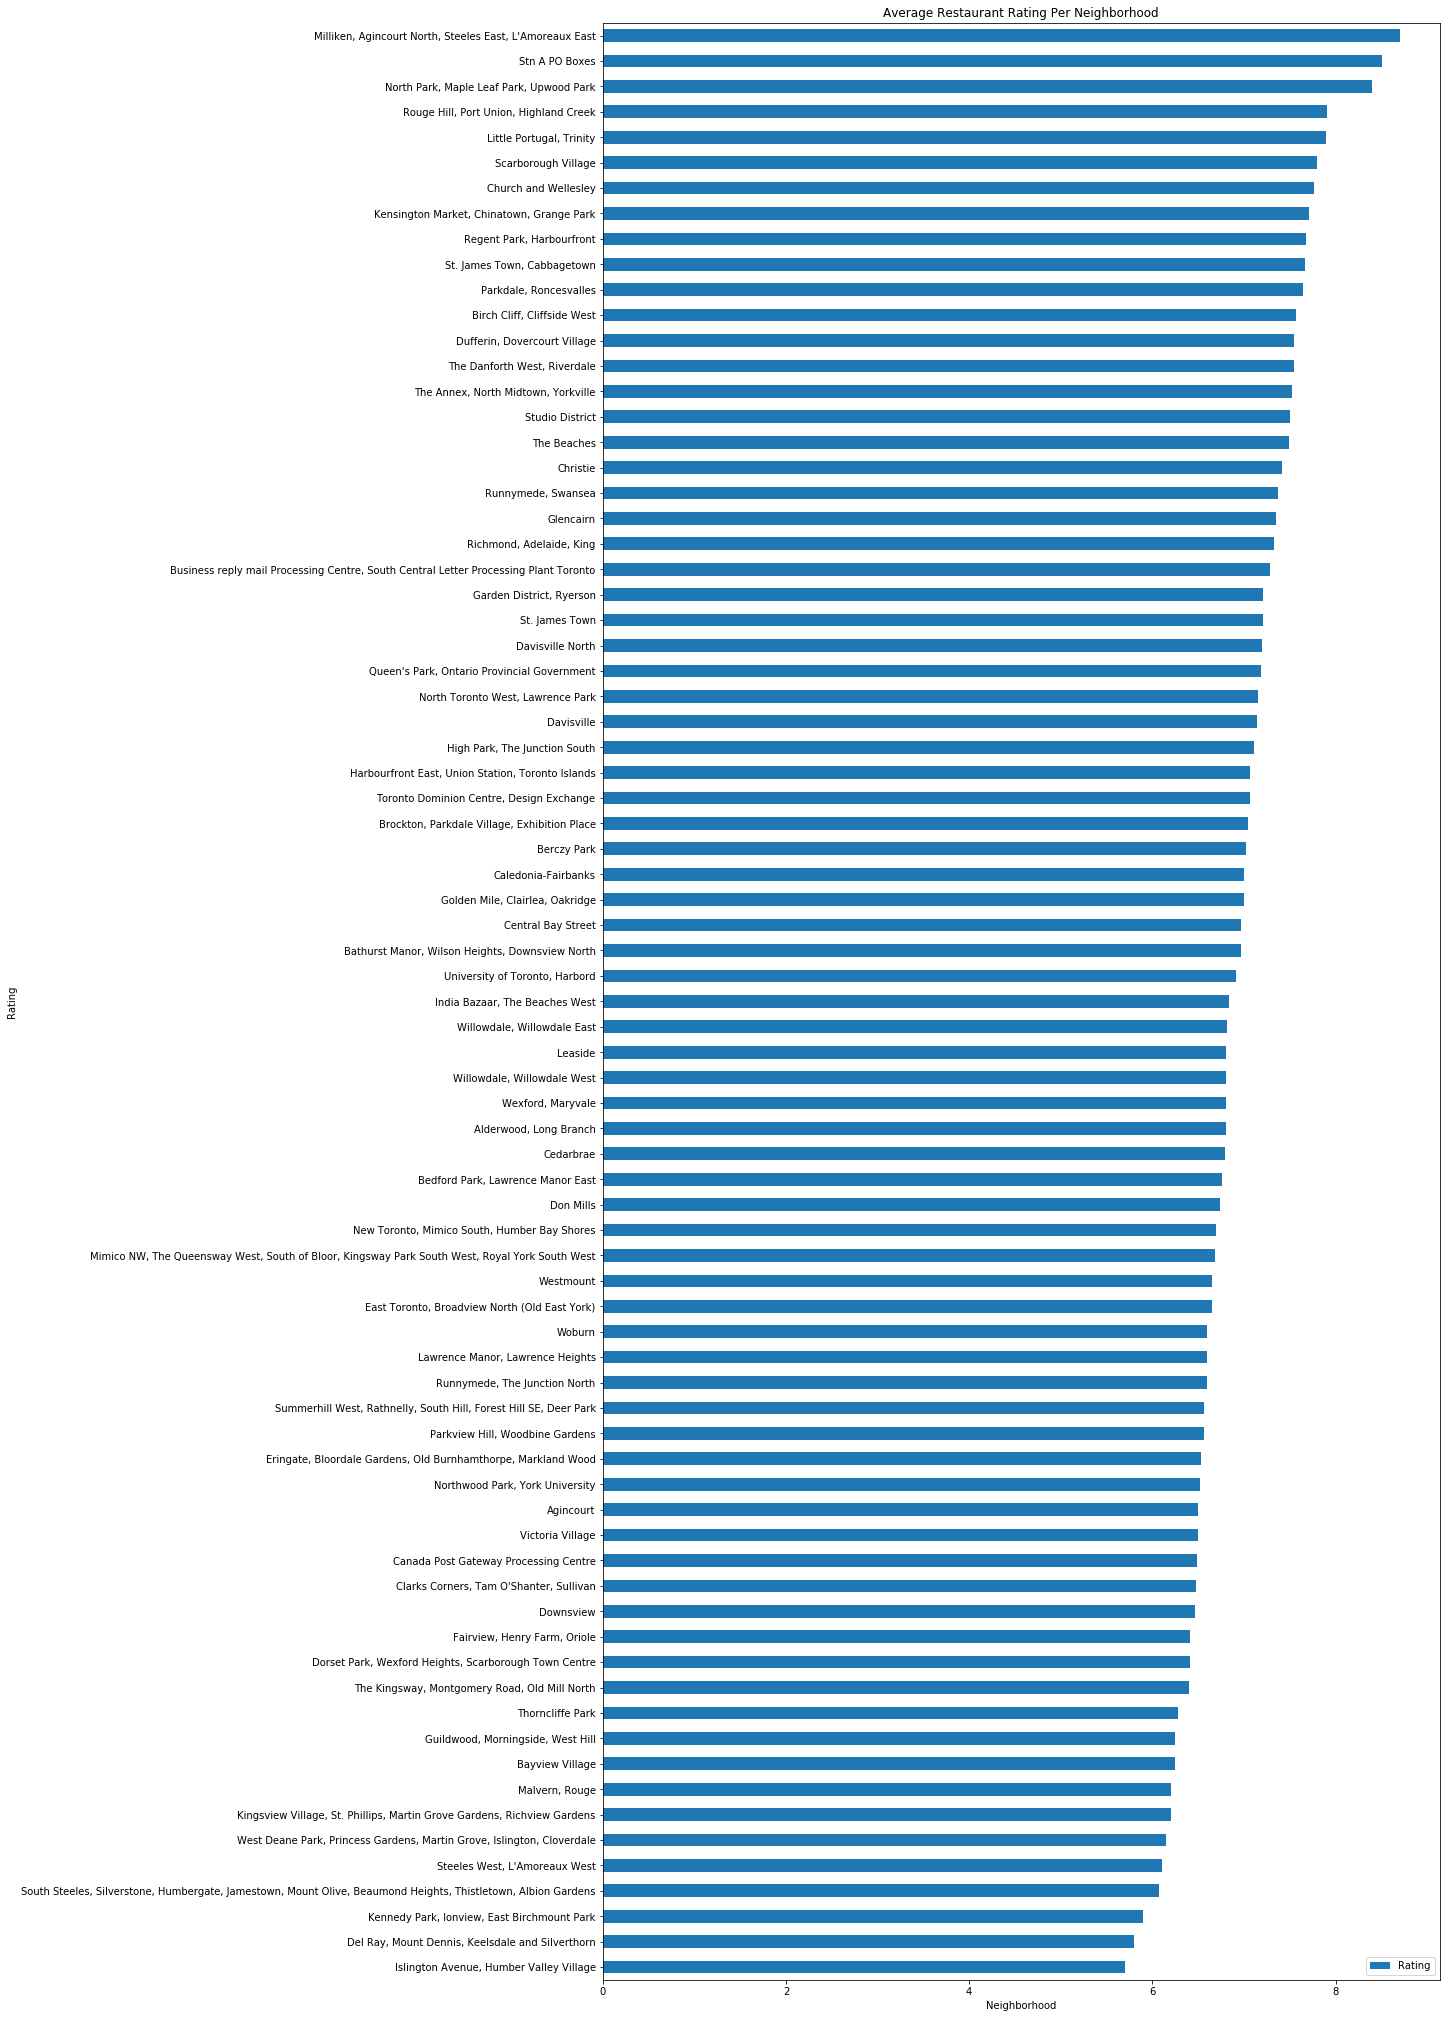

In [10]:
df_rtavgs = pd.DataFrame(neighborhood_avgs['Rating'])
df_rtavgs.plot(kind='barh', figsize=(15, 36))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Rating') # add y-label to the plot
plt.title('Average Restaurant Rating Per Neighborhood') # add title to the plot
plt.show()

In [11]:
venue_cat_avgs = full_data_rated.groupby('Venue Category')[['Rating','Likes','Tips']].mean().sort_values(by='Rating',axis=0)
venue_cat_avgs

,Rating,Likes,Tips
Venue Category,,,
Salad Place,5.400000,7.000000,5.000000
Fast Food Restaurant,5.847826,16.195652,9.152174
Shopping Mall,5.900000,17.000000,17.000000
Convenience Store,6.042857,8.285714,5.285714
Dim Sum Restaurant,6.100000,13.000000,4.000000
...,...,...,...
Comic Shop,8.900000,28.000000,9.000000
Theme Restaurant,8.900000,33.000000,6.000000
New American Restaurant,9.000000,180.000000,59.000000


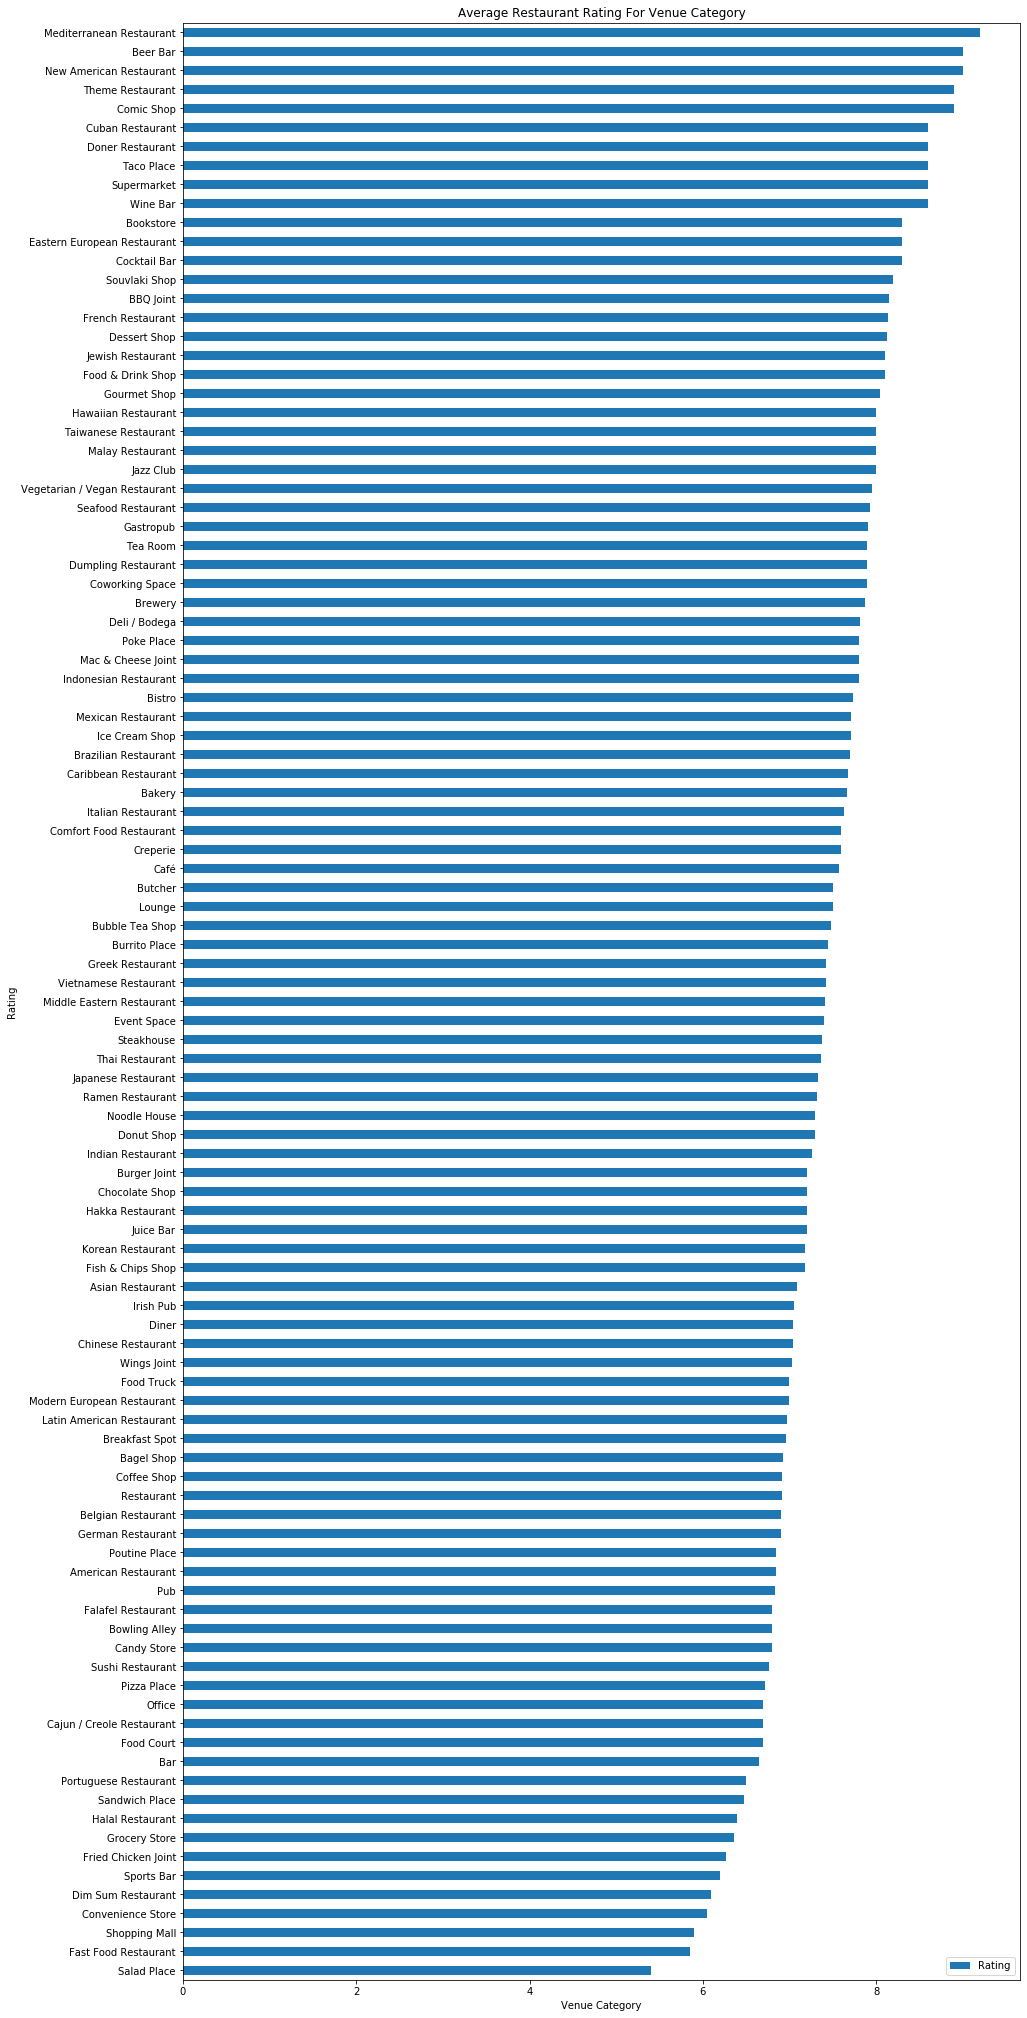

In [12]:
df_catavgs = pd.DataFrame(venue_cat_avgs['Rating'])
df_catavgs.plot(kind='barh', figsize=(15, 36))

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Rating') # add y-label to the plot
plt.title('Average Restaurant Rating For Venue Category') # add title to the plot
plt.show()

In [13]:
full_data_rated.groupby(['Neighborhood','Venue Category'])[['Rating','Likes','Tips']].mean().sort_values(by='Rating',axis=0)

Rating  \
Neighborhood                                       Venue Category                     
Brockton, Parkdale Village, Exhibition Place       Grocery Store                4.5   
Willowdale, Willowdale East                        Gastropub                    4.5   
Harbourfront East, Union Station, Toronto Islands  Sports Bar                   4.7   
Summerhill West, Rathnelly, South Hill, Forest ... Fast Food Restaurant         4.8   
Little Portugal, Trinity                           Convenience Store            4.8   
...                                                                             ...   
                                                   Japanese Restaurant          9.1   
Kensington Market, Chinatown, Grange Park          Mexican Restaurant           9.2   
Richmond, Adelaide, King                           Mediterranean Restaurant     9.2   
Parkdale, Roncesvalles                             Pizza Place                  9.2   
Regent Park, Harbourfront                          Mediterranean Restaurant     9.2   

                                                                             Likes  \
Neighborhood                                       Venue Category                    
Brockton, Parkdale Village, Exhibition Place       Grocery Store               2.0   
Willowdale, Willowdale East                        Gastropub                   4.0   
Harbourfront East, Union Station, Toronto Islands  Sports Bar                 34.0   
Summerhill West, Rathnelly, South Hill, Forest ... Fast Food Restaurant        7.0   
Little Portugal, Trinity                           Convenience Store           5.0   
...                                                                            ...   
                                                   Japanese Restaurant        48.0   
Kensington Market, Chinatown, Grange Park          Mexican Restaurant        299.0   
Richmond, Adelaide, King                           Mediterranean Restaurant  243.0   
Parkdale, Roncesvalles                             Pizza Place                75.0   
Regent Park, Harbourfront                          Mediterranean Restaurant   53.0   

                                                                             Tips  
Neighborhood                                       Venue Category                  
Brockton, Parkdale Village, Exhibition Place       Grocery Store              3.0  
Willowdale, Willowdale East                        Gastropub                 45.0  
Harbourfront East, Union Station, Toronto Islands  Sports Bar                53.0  
Summerhill West, Rathnelly, South Hill, Forest ... Fast Food Restaurant       5.0  
Little Portugal, Trinity                           Convenience Store         11.0  
...                                                                           ...  
                                                   Japanese Restaurant        9.0  
Kensington Market, Chinatown, Grange Park          Mexican Restaurant        98.0  
Richmond, Adelaide, King                           Mediterranean Restaurant  85.0  
Parkdale, Roncesvalles                             Pizza Place               26.0  
Regent Park, Harbourfront                          Mediterranean Restaurant  15.0  

[642 rows x 3 columns]

In [14]:
full_data_rate_class = pd.DataFrame(full_data_rated)
full_data_rate_class = full_data_rate_class[['Neighborhood','Venue Category','Rating']]
full_data_rate_class['Rating'] = round(full_data_rate_class['Rating'],0)
full_data_rate_class.reset_index(inplace=True)
full_data_rate_class = full_data_rate_class.drop(columns=['index'])
full_data_rate_class

,Neighborhood,Venue Category,Rating
0,Victoria Village,Coffee Shop,6.0
1,Victoria Village,Portuguese Restaurant,6.0
2,"Regent Park, Harbourfront",Coffee Shop,9.0
3,"Regent Park, Harbourfront",Coffee Shop,9.0
4,"Regent Park, Harbourfront",Grocery Store,6.0
...,...,...,...
911,"Mimico NW, The Queensway West, South of Bloor,...",Convenience Store,6.0
912,"Mimico NW, The Queensway West, South of Bloor,...",Bakery,7.0
913,"Mimico NW, The Queensway West, South of Bloor,...",Sandwich Place,6.0
914,"Mimico NW, The Queensway West, South of Bloor,...",Coffee Shop,6.0


In [46]:
df_hood_counts = pd.DataFrame(full_data_rate_class['Neighborhood'].value_counts())
df_hood_counts

,Neighborhood
"Harbourfront East, Union Station, Toronto Islands",58
St. James Town,35
"Queen's Park, Ontario Provincial Government",34
"Kensington Market, Chinatown, Grange Park",34
"Garden District, Ryerson",34
...,...
"The Kingsway, Montgomery Road, Old Mill North",1
Stn A PO Boxes,1
"Islington Avenue, Humber Valley Village",1
Scarborough Village,1


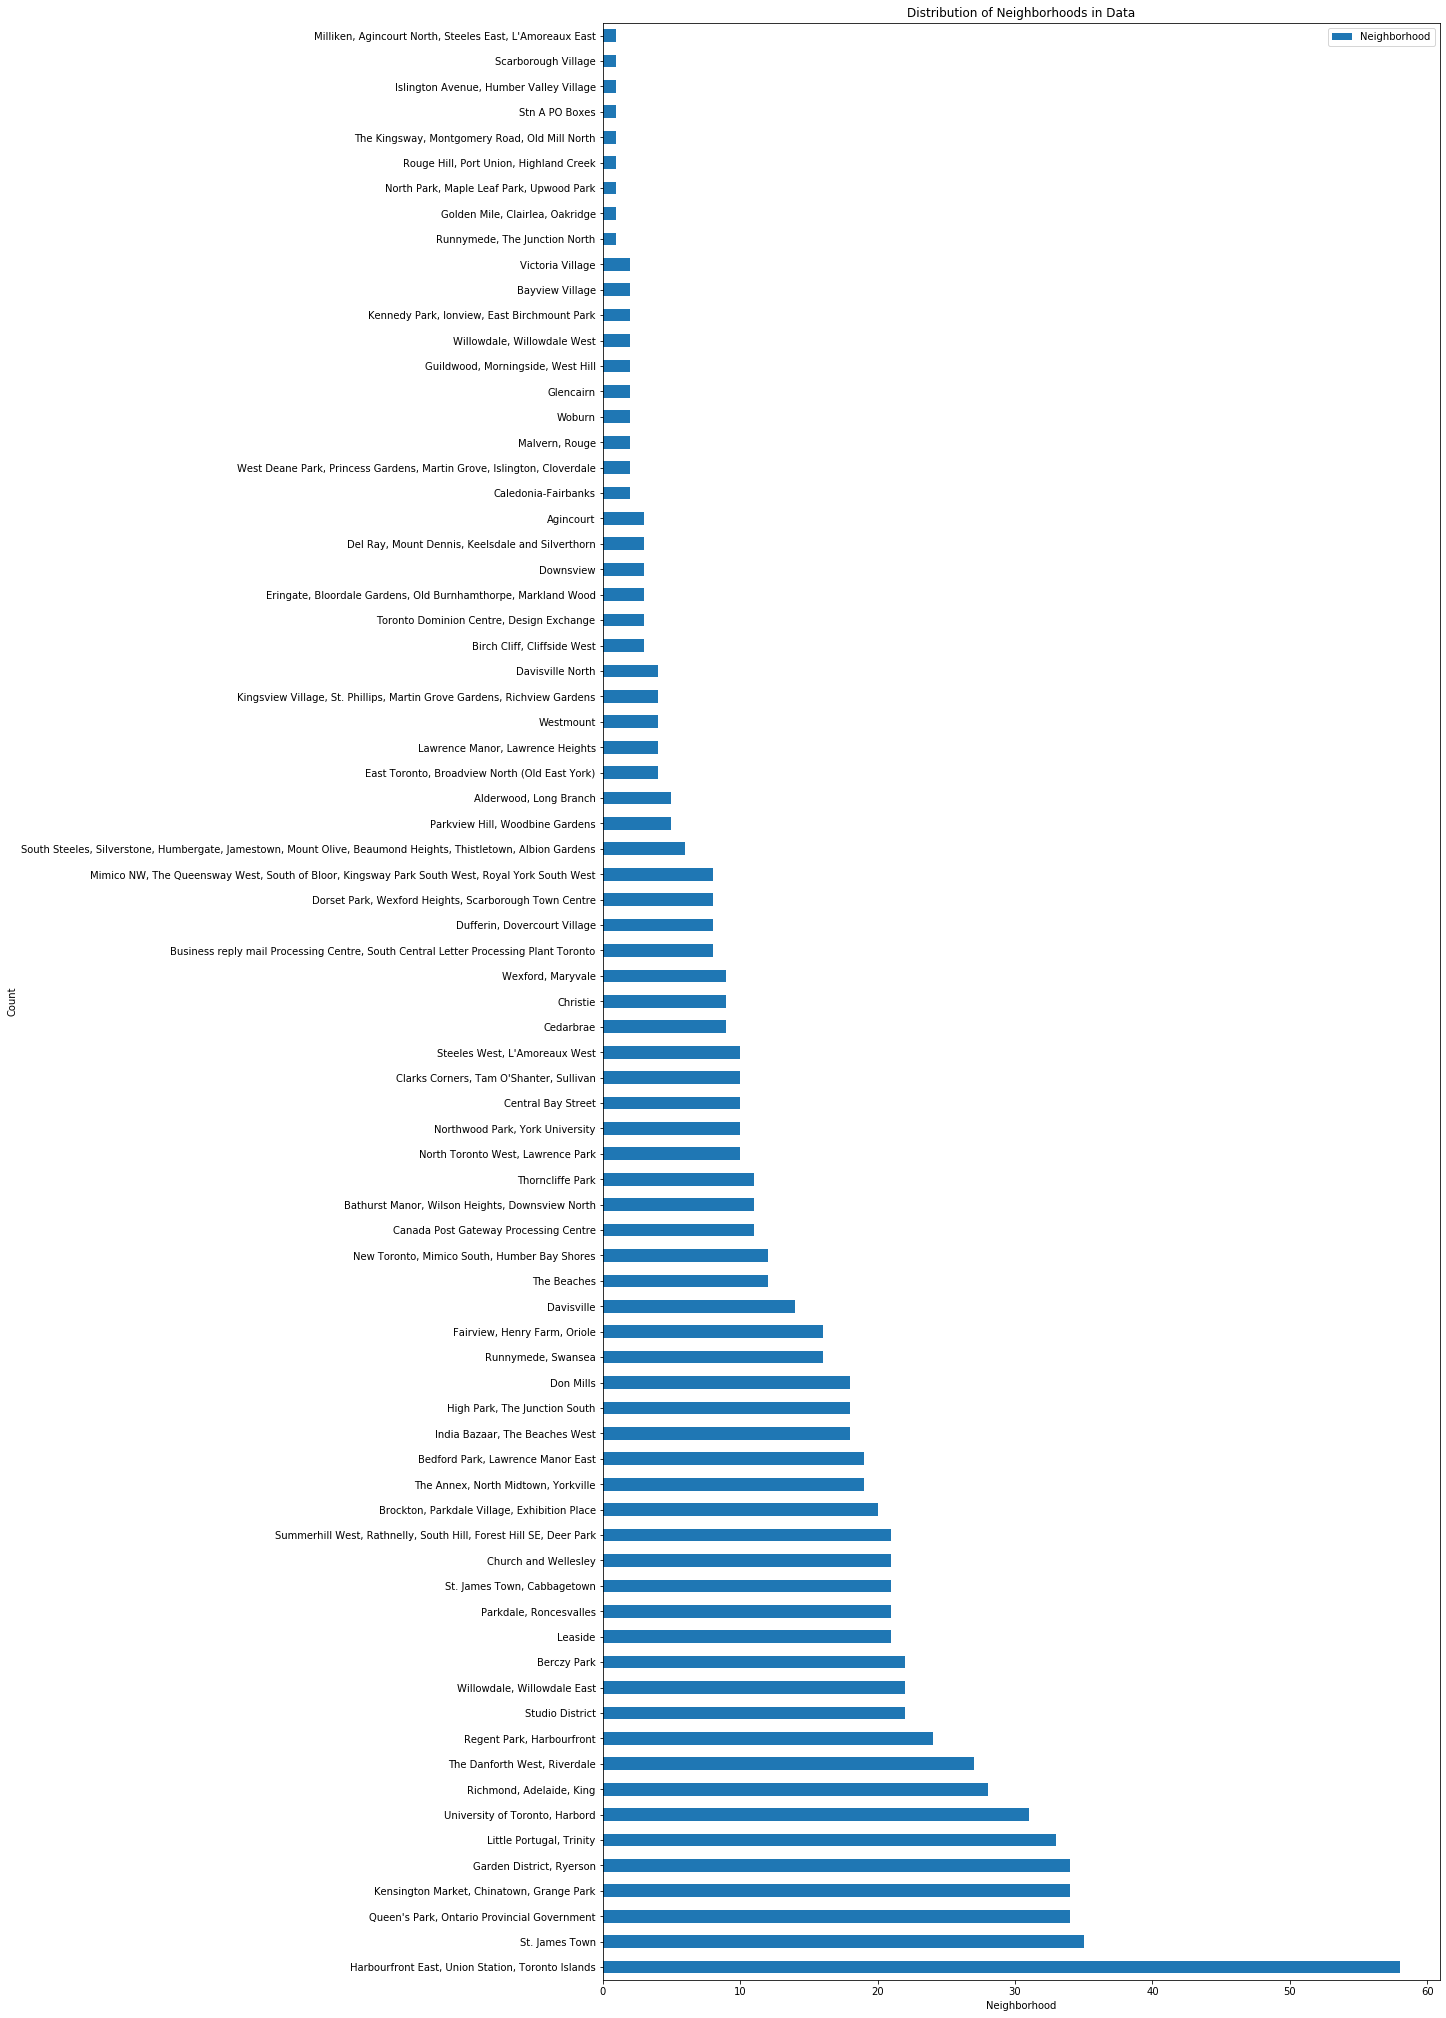

In [47]:
df_hood_counts.plot(kind='barh', figsize=(15, 36))
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Distribution of Neighborhoods in Data') # add title to the plot
plt.show()

In [43]:
df_cat_counts = pd.DataFrame(full_data_rate_class['Venue Category'].value_counts())
df_cat_counts

,Venue Category
Coffee Shop,156
Café,52
Sandwich Place,50
Restaurant,48
Fast Food Restaurant,46
...,...
Cajun / Creole Restaurant,1
Hakka Restaurant,1
Noodle House,1
Food & Drink Shop,1


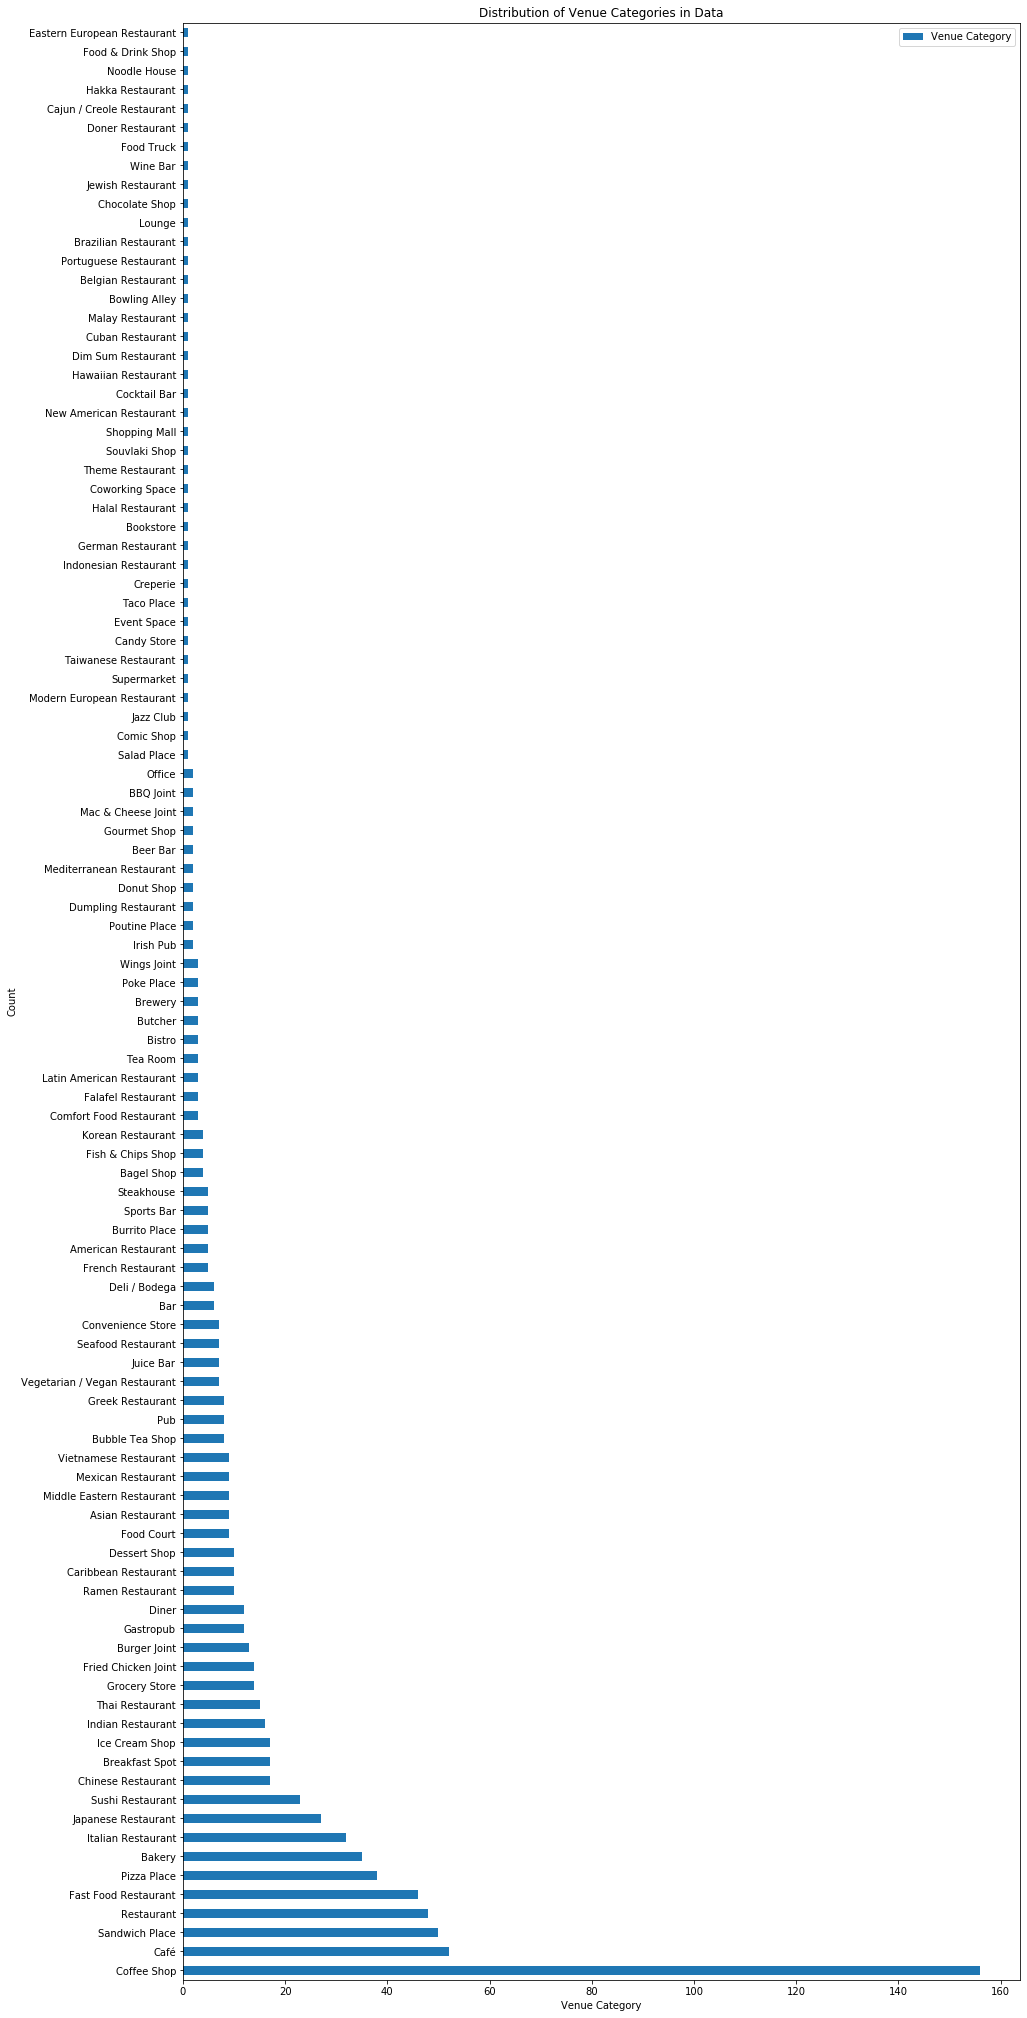

In [45]:
df_cat_counts.plot(kind='barh', figsize=(15, 36))
plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Distribution of Venue Categories in Data') # add title to the plot
plt.show()

In [44]:
df_rat_counts = pd.DataFrame(full_data_rate_class['Rating'].value_counts())
df_rat_counts

,Rating
8.0,271
7.0,260
6.0,258
9.0,83
5.0,42
4.0,2


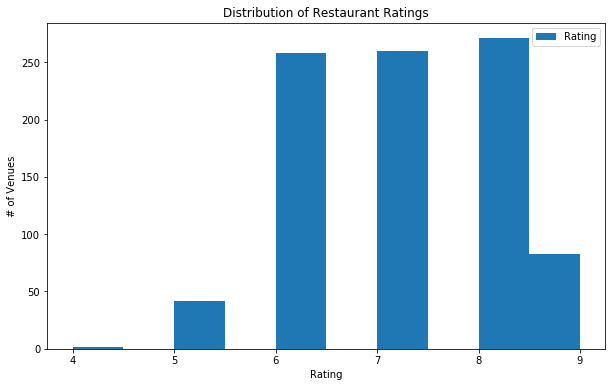

In [16]:
df_classes = pd.DataFrame(full_data_rate_class['Rating'])
df_classes.plot(kind='hist', figsize=(10, 6))

plt.xlabel('Rating') # add to x-label to the plot
plt.ylabel('# of Venues') # add y-label to the plot
plt.title('Distribution of Restaurant Ratings') # add title to the plot
plt.show()

<h3>Machine Learning</h3>

One-hot Encoding for Machine Learning.

In [18]:
features = full_data_rate_class[['Neighborhood','Venue Category']]
X = pd.get_dummies(features)
Y = full_data_rate_class['Rating']
X

,Neighborhood_Agincourt,"Neighborhood_Alderwood, Long Branch","Neighborhood_Bathurst Manor, Wilson Heights, Downsview North",Neighborhood_Bayview Village,"Neighborhood_Bedford Park, Lawrence Manor East",Neighborhood_Berczy Park,"Neighborhood_Birch Cliff, Cliffside West","Neighborhood_Brockton, Parkdale Village, Exhibition Place","Neighborhood_Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",Neighborhood_Caledonia-Fairbanks,...,Venue Category_Sushi Restaurant,Venue Category_Taco Place,Venue Category_Taiwanese Restaurant,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Theme Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Done to stop seeing the data conversion warnings
import warnings
warnings.filterwarnings("ignore")


In [28]:
from sklearn.tree import DecisionTreeClassifier

critic = ['gini','entropy']
bestAcc = 0
bestTree = None

for c in critic:
    for depth in range(1,10):
        dTree = DecisionTreeClassifier(criterion=c, max_depth = depth)
        pipeline = make_pipeline(preprocessing.StandardScaler(), dTree)
        if depth == 1:
            dTree = DecisionTreeClassifier(criterion=c)
            pipeline = make_pipeline(preprocessing.StandardScaler(), dTree)
        scores = cross_val_score(pipeline, X, Y, cv=5)
        testAcc = np.mean(scores)
        
        #dTree = DecisionTreeClassifier(criterion=c, max_depth = depth).fit(x_train,y_train)
        #We'll test a few depths, with 1 being no limit
        #if depth == 1:
        #    dTree = DecisionTreeClassifier(criterion=c).fit(x_train,y_train)
        #testAcc = metrics.accuracy_score(y_test, dTree.predict(x_test))
        print(c + " " + str(depth) + " " + str(testAcc))
        #If test acc better than best current accuracy, note current classifier as best
        if testAcc > bestAcc:
            bestAcc = testAcc
            bestTree = dTree  

print(bestTree)
print(bestAcc)

gini 1 0.30664777167641855
gini 2 0.3636215115460509
gini 3 0.337564130272306
gini 4 0.33516369740315094
gini 5 0.347150893366436
gini 6 0.3361011696095299
gini 7 0.3415485453402776
gini 8 0.3393147092942869
gini 9 0.3415246540456681
entropy 1 0.29881894545339593
entropy 2 0.3636215115460509
entropy 3 0.337157978263944
entropy 4 0.30995384485519495
entropy 5 0.31543092414442897
entropy 6 0.3253037405347709
entropy 7 0.3384200612754011
entropy 8 0.34265932997984505
entropy 9 0.34594454354843057
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.3636215115460509


In [31]:
from sklearn.neighbors import KNeighborsClassifier

bestAcc = 0
bestKNN = None
weights = ['uniform','distance']
for w in weights:
    for k in range(1,21):
        kNNClass = KNeighborsClassifier(weights = w, n_neighbors = k)
        pipeline = make_pipeline(preprocessing.StandardScaler(), kNNClass)
        scores = cross_val_score(pipeline, X, Y, cv=5)
        testAcc = np.mean(scores)    

        #Train kNN for a k
        #kNNClass = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
        #Get test acc
        #testAcc = metrics.accuracy_score(y_test, kNNClass.predict(x_test))
        #If test acc better than best current accuracy, note current classifier as best
        print(str(k) + " " + str(testAcc))
        if testAcc > bestAcc:
            bestAcc = testAcc
            bestKNN = kNNClass
print(bestKNN)
print(bestAcc)

1 0.21562195132190837
2 0.1991613910277776
3 0.18077831535471828
4 0.19809962397163766
5 0.21015849381875135
6 0.22009807517519242
7 0.22228336636784912
8 0.23535105065710932
9 0.24302082847212292
10 0.24944326003095224
11 0.25133775851867657
12 0.2492231883797047
13 0.26139434741676826
14 0.24401925338072425
15 0.2758479084101763
16 0.28340985427989585
17 0.2781107352345348
18 0.2899377888776348
19 0.3053463788940648
20 0.294475518727179
1 0.21562195132190837
2 0.20686011013716255
3 0.18826239394467495
4 0.21006919257726367
5 0.20140194268379244
6 0.2090771516306253
7 0.20467469891949325
8 0.20576204393752479
9 0.22976096939780688
10 0.2251336771997301
11 0.23487598428735712
12 0.2304382063198907
13 0.22937966151419817
14 0.21632927293453602
15 0.23156616664404353
16 0.2416589136036007
17 0.2559045496876046
18 0.2690207998872186
19 0.2690207998872186
20 0.2625227594139947
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=Non

In [32]:
avg = np.mean(full_data_rated['Rating'])
avg_class = round(avg,0)
print("Average Rating: {} Average Class {}".format(avg,avg_class))

correct = 0
for val in Y:
    if val == avg_class:
        correct += 1
print("Naive Classifier (assume the average): {}".format(correct/len(Y)))

Average Rating: 7.103275109170306 Average Class 7.0
Naive Classifier (assume the average): 0.2838427947598253


In [39]:
correct2 = 0
for val in Y:
    if val == 8:
        correct2 += 1
print("Naive Classifier (assume the average): {}".format(correct2/len(Y)))

Naive Classifier (assume the average): 0.29585152838427947


<h3>Predictions</h3>

In [33]:
neighborhoods = full_data_rate_class['Neighborhood'].unique()
venue_cats = full_data_rate_class['Venue Category'].unique()

remaining_pairs = list()
for n in neighborhoods:
    for v in venue_cats:
        if full_data_rate_class[(full_data_rate_class['Neighborhood'] == n) & (full_data_rate_class['Venue Category'] == v)].shape[0] == 0:
            remaining_pairs.append([n, v])
df_remain = pd.DataFrame(remaining_pairs, columns=['Neighborhood','Venue Category'])
df_remain

,Neighborhood,Venue Category
0,Victoria Village,Grocery Store
1,Victoria Village,Café
2,Victoria Village,Sandwich Place
3,Victoria Village,Bakery
4,Victoria Village,Asian Restaurant
...,...,...
7284,"Mimico NW, The Queensway West, South of Bloor,...",Salad Place
7285,"Mimico NW, The Queensway West, South of Bloor,...",Taiwanese Restaurant
7286,"Mimico NW, The Queensway West, South of Bloor,...",Theme Restaurant
7287,"Mimico NW, The Queensway West, South of Bloor,...",Bookstore


In [35]:
remain_x = pd.get_dummies(df_remain)

In [36]:
bestKNN.fit(X,Y)
predictions = bestKNN.predict(remain_x)
df_remain_kNN = pd.DataFrame(df_remain)
for i in range(0,df_remain.shape[0]):
    df_remain_kNN['Predicted Rating'] = predictions[i]
df_remain_kNN.sort_values(by='Predicted Rating',axis=0,inplace=True)
df_remain_kNN

,Neighborhood,Venue Category,Predicted Rating
0,Victoria Village,Grocery Store,8.0
4865,Westmount,Italian Restaurant,8.0
4864,Westmount,Convenience Store,8.0
4863,Westmount,Caribbean Restaurant,8.0
4862,Westmount,Indian Restaurant,8.0
...,...,...,...
2423,"Richmond, Adelaide, King",Middle Eastern Restaurant,8.0
2422,"Richmond, Adelaide, King",Vegetarian / Vegan Restaurant,8.0
2421,"Richmond, Adelaide, King",Fried Chicken Joint,8.0
2447,"Richmond, Adelaide, King",Food & Drink Shop,8.0


In [52]:
df_remain_kNN['Predicted Rating'].value_counts()

8.0    7289
Name: Predicted Rating, dtype: int64

In [37]:
bestTree.fit(X,Y)
predictions_tree = bestTree.predict(remain_x)
df_remain_tree = pd.DataFrame(df_remain)
for i in range(0,df_remain.shape[0]):
    df_remain_tree['Predicted Rating'] = predictions[i]
df_remain_tree.sort_values(by='Predicted Rating',axis=0,inplace=True)
df_remain_tree

,Neighborhood,Venue Category,Predicted Rating
0,Victoria Village,Grocery Store,8.0
4865,Westmount,Italian Restaurant,8.0
4864,Westmount,Convenience Store,8.0
4863,Westmount,Caribbean Restaurant,8.0
4862,Westmount,Indian Restaurant,8.0
...,...,...,...
2423,"Richmond, Adelaide, King",Middle Eastern Restaurant,8.0
2422,"Richmond, Adelaide, King",Vegetarian / Vegan Restaurant,8.0
2421,"Richmond, Adelaide, King",Fried Chicken Joint,8.0
2447,"Richmond, Adelaide, King",Food & Drink Shop,8.0


In [53]:
df_remain_tree['Predicted Rating'].value_counts()

8.0    7289
Name: Predicted Rating, dtype: int64

The models created seem to exclusively predict 8.0 venues, which may be related to how common they are in the data set.